# Trabalho1 - Elvis e Paulo
> ADS 6º Semestre maio/2022
## Dataset: [**sklearn.datasets.fetch_olivetti_faces**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces)

## Objetivos do projeto
>1. Descreva, brevemente, o dataset escolhido com comentários no próprio código;
>2. Caso necessário, prepare o dataset: ele deve ser binário e balanceado. Pode ser necessário
normalizar também;
>3. Divida os dados em dados de treinamento e de teste;
>4. Crie gráficos da função de custo e do número de acertos em função das épocas. Faça os
gráficos para os dados de treinamento e de teste.

# Início

>**SKLEARN** | *biblioteca do python para machine learning*
<hr>

>**PANDAS** | *manipulação e análise de dados*
<hr>

>**MATPLOTLIB.PUPLOT** | *biblioteca de software para criação de gráficos*
<hr>

>**NUMPY** | *processamento de grandes, multi-dimensionais arranjos e matrizes*)
<hr>

### CRIANDO UM DATAFRAME E CONFIGURADO TARGET NO VALOR DE -1.0 PARA TODOS ITENS
>df_images = pd.DataFrame(olivetti.data)<br>
>df_images['target'] = -1.0<br>
>df_images


In [1]:
from sklearn import datasets 
import numpy as np #
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

#CRIANDO UM DATAFRAME COM UM TARGET CONFIGURADO PARA TODOS O VALOR -1.0
df_images = pd.DataFrame(olivetti.data)
df_images['target'] = -1.0
df_images

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,-1.0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,-1.0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,-1.0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,-1.0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,-1.0
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,-1.0
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,-1.0
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,-1.0


## Pegando o total de 100 rostos sendo:
- 50 com óculos
- 50 sem óculos

In [2]:
for i in df_images.index:
    if i < 240:
        df_images.drop(i, inplace = True)
    elif i > 249 and i < 260:
        df_images.drop(i, inplace = True)
    elif i > 309 and i < 330:
        df_images.drop(i, inplace = True)
    elif i > 349 and i < 360:
        df_images.drop(i, inplace = True)
    elif i > 379:
        df_images.drop(i, inplace = True)
        
df_images

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
240,0.557851,0.628099,0.677686,0.702479,0.710744,0.743802,0.756198,0.764463,0.785124,0.789256,...,0.132231,0.293388,0.322314,0.392562,0.462810,0.475207,0.446281,0.272727,0.392562,-1.0
241,0.793388,0.789256,0.780992,0.785124,0.789256,0.785124,0.785124,0.785124,0.785124,0.789256,...,0.289256,0.119835,0.132231,0.276859,0.367769,0.371901,0.322314,0.314050,0.359504,-1.0
242,0.632231,0.677686,0.673554,0.710744,0.739669,0.756198,0.772727,0.780992,0.793388,0.797521,...,0.198347,0.136364,0.268595,0.318182,0.384298,0.475207,0.487603,0.392562,0.314050,-1.0
243,0.169421,0.293388,0.561983,0.677686,0.727273,0.756198,0.768595,0.785124,0.797521,0.805785,...,0.384298,0.388430,0.371901,0.363636,0.363636,0.359504,0.342975,0.363636,0.376033,-1.0
244,0.227273,0.219008,0.214876,0.173554,0.309917,0.586777,0.702479,0.739669,0.764463,0.785124,...,0.359504,0.359504,0.347107,0.355372,0.347107,0.347107,0.355372,0.347107,0.351240,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.086777,0.099174,0.115702,0.128099,0.214876,0.359504,0.512397,0.603306,0.652893,0.702479,...,0.487603,0.479339,0.466942,0.450413,0.454545,0.454545,0.210744,0.318182,0.491736,-1.0
376,0.165289,0.285124,0.404959,0.504132,0.595041,0.665289,0.698347,0.714876,0.752066,0.776860,...,0.363636,0.318182,0.185950,0.181818,0.173554,0.363636,0.297521,0.177686,0.231405,-1.0
377,0.285124,0.376033,0.454545,0.524793,0.578512,0.669421,0.710744,0.727273,0.731405,0.743802,...,0.396694,0.404959,0.210744,0.351240,0.322314,0.384298,0.338843,0.322314,0.330579,-1.0
378,0.136364,0.107438,0.090909,0.115702,0.115702,0.119835,0.181818,0.417355,0.586777,0.628099,...,0.475207,0.491736,0.504132,0.466942,0.462810,0.454545,0.446281,0.471074,0.454545,-1.0


## Ordenando o index(índice) do dataset

In [3]:
df_images = df_images.reset_index(drop=True)
df_images

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.557851,0.628099,0.677686,0.702479,0.710744,0.743802,0.756198,0.764463,0.785124,0.789256,...,0.132231,0.293388,0.322314,0.392562,0.462810,0.475207,0.446281,0.272727,0.392562,-1.0
1,0.793388,0.789256,0.780992,0.785124,0.789256,0.785124,0.785124,0.785124,0.785124,0.789256,...,0.289256,0.119835,0.132231,0.276859,0.367769,0.371901,0.322314,0.314050,0.359504,-1.0
2,0.632231,0.677686,0.673554,0.710744,0.739669,0.756198,0.772727,0.780992,0.793388,0.797521,...,0.198347,0.136364,0.268595,0.318182,0.384298,0.475207,0.487603,0.392562,0.314050,-1.0
3,0.169421,0.293388,0.561983,0.677686,0.727273,0.756198,0.768595,0.785124,0.797521,0.805785,...,0.384298,0.388430,0.371901,0.363636,0.363636,0.359504,0.342975,0.363636,0.376033,-1.0
4,0.227273,0.219008,0.214876,0.173554,0.309917,0.586777,0.702479,0.739669,0.764463,0.785124,...,0.359504,0.359504,0.347107,0.355372,0.347107,0.347107,0.355372,0.347107,0.351240,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.086777,0.099174,0.115702,0.128099,0.214876,0.359504,0.512397,0.603306,0.652893,0.702479,...,0.487603,0.479339,0.466942,0.450413,0.454545,0.454545,0.210744,0.318182,0.491736,-1.0
96,0.165289,0.285124,0.404959,0.504132,0.595041,0.665289,0.698347,0.714876,0.752066,0.776860,...,0.363636,0.318182,0.185950,0.181818,0.173554,0.363636,0.297521,0.177686,0.231405,-1.0
97,0.285124,0.376033,0.454545,0.524793,0.578512,0.669421,0.710744,0.727273,0.731405,0.743802,...,0.396694,0.404959,0.210744,0.351240,0.322314,0.384298,0.338843,0.322314,0.330579,-1.0
98,0.136364,0.107438,0.090909,0.115702,0.115702,0.119835,0.181818,0.417355,0.586777,0.628099,...,0.475207,0.491736,0.504132,0.466942,0.462810,0.454545,0.446281,0.471074,0.454545,-1.0


## Corrigindo o target para 1 caso for imagem com óculos

In [4]:
for i in range(100):
    if i > 9 and i < 30:        
        df_images['target'].loc[df_images.index[i]] = 1
    elif i > 49 and i < 70:        
        df_images['target'].loc[df_images.index[i]] = 1
    elif i > 79 and i < 90:        
        df_images['target'].loc[df_images.index[i]] = 1

C:\Users\Paulo\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Comparando se as fotos e o targets estão corretos

<Figure size 432x288 with 0 Axes>

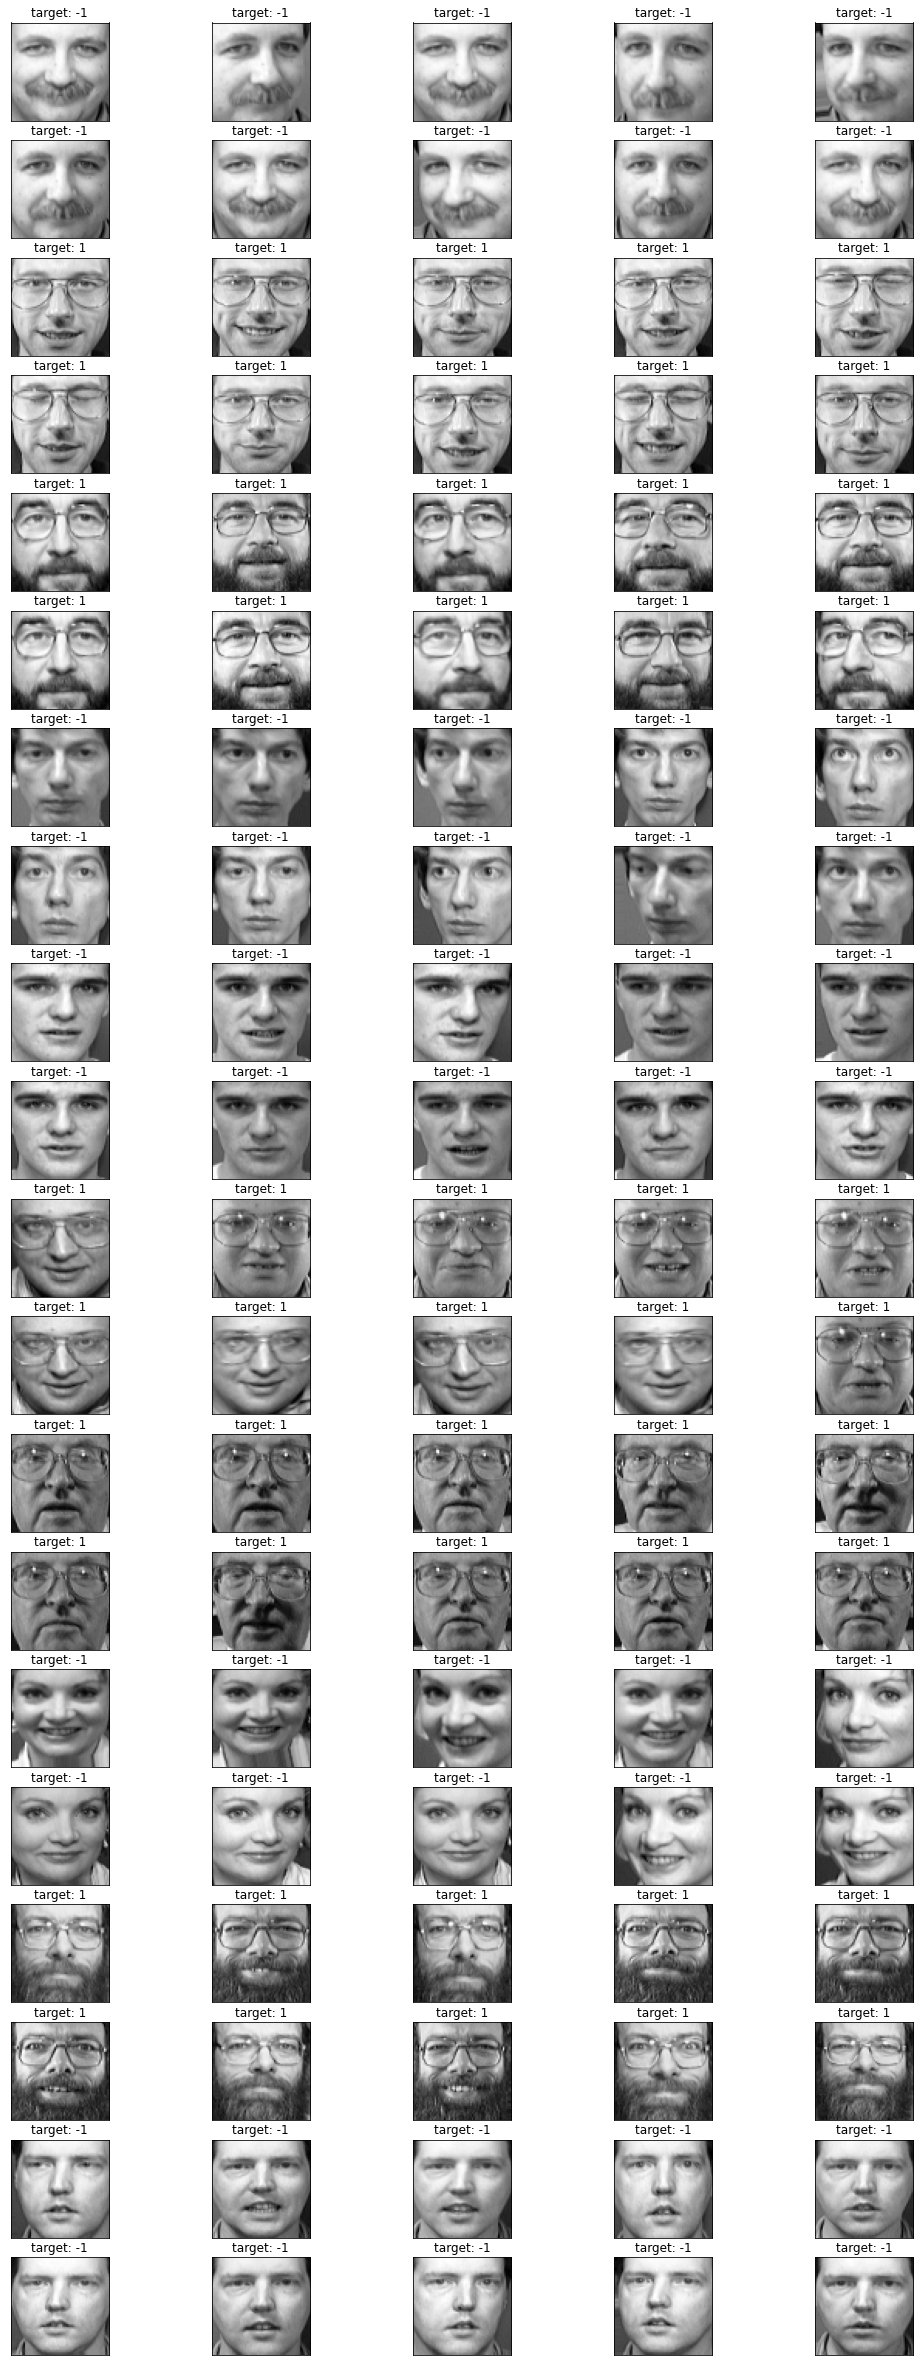

In [5]:
plt.gray()
fig, axs = plt.subplots(nrows=20, ncols=5, figsize=(180, 180),
                        subplot_kw={'xticks': [], 'yticks': []})

#target = np.array(df_images.columns['target'])

face = 0
for i in range(0,20):
    for j in range(0,5):
        #print(i,j,face)
        dig = np.array(df_images.drop(columns=['target']))
        dig = np.reshape(dig[face], (64, 64))
        axs[i,j].imshow(dig)
        axs[i,j].set_title('target: %i' %df_images['target'][face])
        face = face + 1

plt.subplots_adjust(bottom=0.7,right=0.2)

# Concluída a etapa de preparação do Dataset

> ### Armazenando os dados nas variáveis e convertendo para arrays

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_images.drop('target',axis=1), 
                                                    df_images['target'],
                                                    random_state=78,
                                                    test_size=0.1)

Xtrain = np.array(X_train)
ytrain = np.array(y_train)
Xtest = np.array(X_test)
ytest = np.array(y_test)

# FUNÇÕES DO TREINAMENTO DA REDE

In [7]:
def neuronio(x,w,b):
    z = np.dot(x,w) + b
    return np.tanh(z)

def custo(resp, ytrain):
    return np.power(resp - ytrain, 2).mean()/2

def qtdAcertos(resp,ytrain):
    return (np.abs(resp-ytrain) < 1).sum()

def delta(x,w,b,y):
    return (1 - (np.tanh(np.dot(x,w) + b))**2) * (np.tanh(np.dot(x,w) + b) - y)

def trainTest(xtrain,w,b,ytrain,xtest,ytest,epoca):
    erroTrain=[]
    erroTest=[]
    acertoTrain=[]
    acertoTest=[]
    
    for i in range(epoca):        
        dC_dw = (Xtrain.T * delta(Xtrain,w,b,ytrain)).mean(axis=1)
        dC_db =             delta(Xtrain,w,b,ytrain).mean()

        w = w - eta * dC_dw 
        b = b - eta * dC_db   

        resp = neuronio(Xtrain,w,b)        
        erro = custo(resp,ytrain)
        erroTrain.append(erro)                
        acerto = qtdAcertos(resp,ytrain)
        acertoTrain.append(acerto)
        
        resp = neuronio(Xtest,w,b)        
        erro = custo(resp,ytest)        
        erroTest.append(erro)        
        acerto = qtdAcertos(resp,ytest)
        acertoTest.append(acerto)
        
    return [erroTrain, erroTest, acertoTrain, acertoTest] 



# INICIO DO TREINAMENTO DA REDE

## Atualização dos pesos e do bias

>- w = pesos
>- b = baias
>- eta = taxa de aprendizado
>- epoca = quantidade de laços para teste (Atualização)

# Por fim o gráfico de comparação entre o valor encontrado pela rede e o valor real

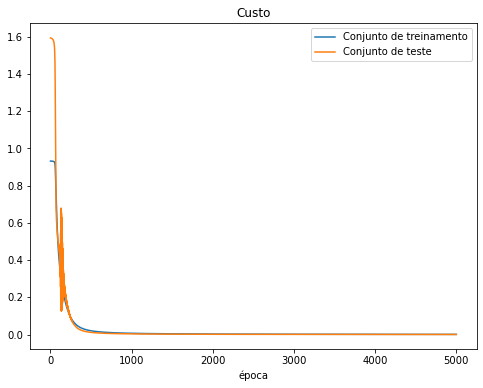

In [8]:
#w = np.random.randn(4096) 
#b = np.random.randn()

w = np.random.uniform(-0.3, 0.3, 4096)
b = np.random.uniform(-0.3, 0.3)

eta = 0.005
epoca = 5000

resposta = trainTest(Xtrain,w,b,ytrain,Xtest,ytest,epoca)

x = np.linspace(0, epoca)
plt.figure(figsize=(8, 6))

plt.plot(resposta[0])
plt.plot(resposta[1])
                           
plt.legend(['Conjunto de treinamento', 'Conjunto de teste'])
plt.title('Custo')
plt.xlabel('época')
plt.show()


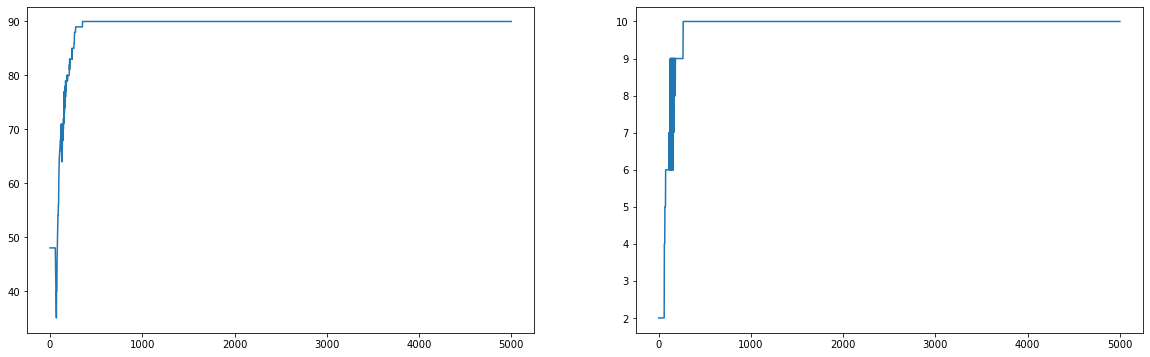

In [9]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(resposta[2])
ax2.plot(resposta[3])

<Figure size 432x288 with 0 Axes>

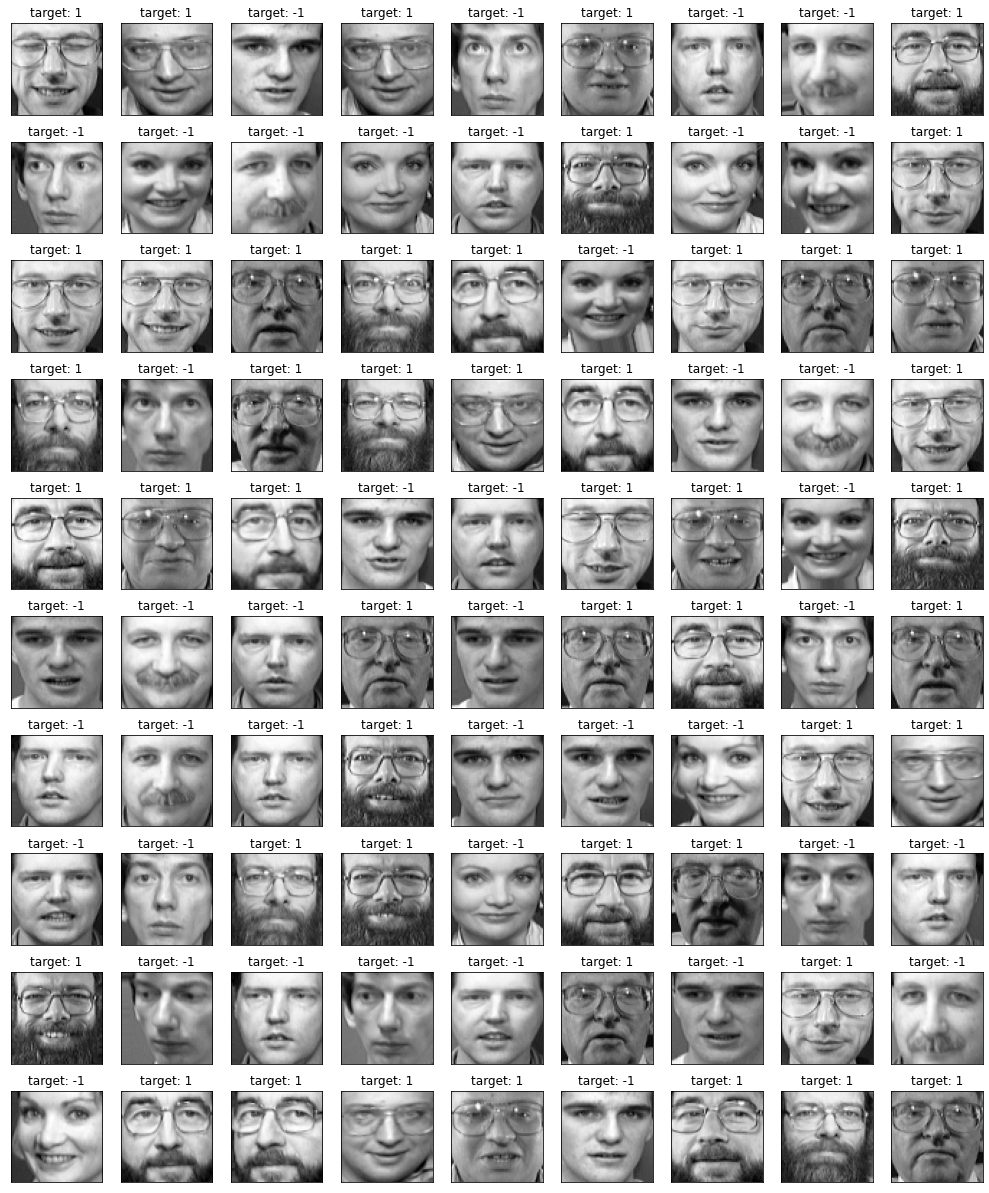

In [10]:
# Comparando as fotos e o target se estão corretos
plt.gray()
fig, axs = plt.subplots(nrows=10, ncols=9, figsize=(180, 180),
                        subplot_kw={'xticks': [], 'yticks': []})

#target = np.array(df_images.columns['target'])

face = 0
for i in range(0,10):
    for j in range(0,9):
        #print(i,j,face)
        dig = np.array(Xtrain)
        dig = np.reshape(dig[face], (64, 64))
        axs[i,j].imshow(dig)
        axs[i,j].set_title('target: %i' %ytrain[face])
        face = face + 1

plt.subplots_adjust(bottom=0.79,right=0.2)

In [13]:
print(b)

0.15776917538759633
